[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
Ticker
AAPL    0
dtype: int64
Ticker                           AAPL
Date                                 
2023-01-03 00:00:00+00:00  125.070000
2023-01-04 00:00:00+00:00  126.360001
2023-01-05 00:00:00+00:00  125.019997
2023-01-06 00:00:00+00:00  129.619995
2023-01-09 00:00:00+00:00  130.149994
...                               ...
2023-12-22 00:00:00+00:00  193.600006
2023-12-26 00:00:00+00:00  193.050003
2023-12-27 00:00:00+00:00  193.149994
2023-12-28 00:00:00+00:00  193.580002
2023-12-29 00:00:00+00:00  192.529999

[250 rows x 1 columns]
7501
successfully filter out candidate wave
5524
successfully filter out candidate wave 12
1394
successfully filter out candidate wave123
760
successfully filter out candidate wave1234
3466
successfully filter out candidate wave12345


<Figure size 1600x800 with 0 Axes>

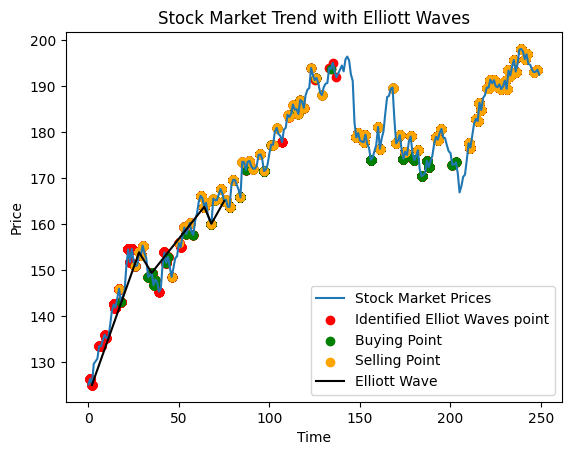

[184.8000030517578, 191.30999755859375, 189.7899932861328, 195.7100067138672, 193.17999267578125, 196.94000244140625]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
648/648 ━━━━━━━━━━━━━━━━━━━━ 63s 91ms/step - loss: 0.0489
Epoch 2/25
648/648 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - loss: 0.0325
Epoch 3/25
648/648 ━━━━━━━━━━━━━━━━━━━━ 98s 113ms/step - loss: 0.0264
Epoch 4/25
648/648 ━━━━━━━━━━━━━━━━━━━━ 68s 92ms/step - loss: 0.0134
Epoch 5/25
428/648 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - loss: 0.0051

In [ ]:
# %%
!pip install taew
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import taew
import pandas_datareader.data as web
import yfinance as yfn
import pandas as pd

# yfn.pdr_override()

# get the stock price of apple company 1 years
start_date = '2023-1-1'
end_date = '2024-1-1'

# Use yfinance directly to fetch data
stock_data = yfn.download('AAPL', start=start_date, end=end_date) #df= Data frame


print(type(stock_data))

stock_data = stock_data['Close']


# %%
#Cleaning the data
stock_data = stock_data.dropna()
print(stock_data.isnull().sum())
print(stock_data)

# %%
prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')


# Identify the upward Elliott wave using the Alternative_ElliottWave_label_upward method from taew library
waves = taew.Alternative_ElliottWave_label_upward(prices)

# %%
waves

# %%
# Extract the x and z values from the identified waves
x_values = []
z_values = []

for wave in waves:
    x_values.extend(wave['x'])
    z_values.extend(wave['z'])


# %%
x_values

# %%
# Function to find the buying point and the selling point in the elliott wave points we found
def retracement(x_values, z_values):
    buyingPoint = []
    buyingIndex = []
    sellingPoint = []
    sellingIndex = []

    i = 0
    while (i + 5) < len(x_values):  # Ensure there are at least 6 points to process
        point0 = x_values[i]
        point1 = x_values[i + 1]
        point2 = x_values[i + 2]
        point3 = x_values[i + 3]
        point4 = x_values[i + 4]
        point5 = x_values[i + 5]

        index0 = z_values[i]
        index1 = z_values[i + 1]
        index2 = z_values[i + 2]
        index3 = z_values[i + 3]
        index4 = z_values[i + 4]
        index5 = z_values[i + 5]

        # Calculate wave differences
        wave1 = point1 - point0
        wave2 = point1 - point2
        wave3 = point3 - point2
        wave4 = point4 - point3
        wave5 = point5 - point4

        # Check retracement conditions
        if wave2 <= wave1 * 0.618:
            buyingPoint.append(point2)
            buyingIndex.append(index2)

        if wave5 >= wave4 * 0.382:
            sellingPoint.append(point5)
            sellingIndex.append(index5)

        # Move to the next set of waves, starting from the last point
        i += 5

    return buyingPoint, buyingIndex, sellingPoint, sellingIndex

# %%
# Function to randomly pick 6 points from the x_values to plot in the graph
from random import randint

def randomize_wave_plot(x_values,z_values):

    # Get the indices that are multiples of 6
    xv = []
    zv = []
    temp = randint(1,len(x_values)/6)

    for i in range(temp*6-6,temp*6):
        xv.append(x_values[i])
        zv.append(z_values[i])

    return xv,zv

# %%
#randomize elliott wave plot
xv,zv = randomize_wave_plot(x_values,z_values)

buy,buy_point,sell,sell_point = retracement(x_values,z_values)

# Visualization of the elliott wave analysis
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
ax.plot(prices, label='Stock Market Prices')
ax.scatter(z_values,x_values,color='red', label='Identified Elliot Waves point')
ax.scatter(buy_point,buy,color='green', label='Buying Point')
ax.scatter(sell_point,sell,color='orange', label='Selling Point')
ax.plot(zv,xv,c='black',label="Elliott Wave")
ax.legend()

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Stock Market Trend with Elliott Waves')

plt.show()

# %%
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import LSTM

# %%
x_values

# %%
last_12_values = x_values[-6:]
print(last_12_values)

# %%
del x_values[-6:]

# %%
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert the list to a pandas Series
x_values_series = pd.Series(x_values)


# %%
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(x_values_series.values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaler_data)):
    x_train.append(scaler_data[x-prediction_days:x, 0])
    y_train.append(scaler_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# %%
scaler_data

# %%
# Build a model #
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  #Prediction of the nxt close price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

# %%
last_12_values = pd.Series(last_12_values)

# %%
# Test the model accuracy on existing data #
# load test data

actual_prices = last_12_values.values

total_dataset = pd.concat((x_values_series, last_12_values), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(last_12_values) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# %%
last_12_values

# %%
model_inputs

# %%
# Make Predictions on test data #
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

# %%
prediction_prices

# %%
last_12_values

# %%
# plot the test predictions #
plt.plot(actual_prices, color="black", label=f"Actal AAPL Price")
plt.plot(prediction_prices, color="green", label=f"Predicted AAPL Price")
plt.title("AAPL Stock Market Price")
plt.xlabel("Time")
plt.ylabel("AAPL Share Price")
plt.legend()
plt.show()

# %%
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, prediction_prices))

# Calculate MAE
mae = mean_absolute_error(actual_prices, prediction_prices)

# Calculate MAPE
mape = (mae / np.mean(actual_prices)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

# %%
# predict the next day #
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

print(scaler.inverse_transform(real_data[-1]))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"nxt prediction : {prediction}")



In [ ]:
!pip install taew
!pip install yfinance
import numpy as np
import matplotlib.pyplot as plt
import taew
import yfinance as yfn
import pandas as pd

def enhanced_fibonacci_trading_signals(x_values, z_values, sensitivity=0.3, min_wave_length=3):
    """
    Enhanced function to identify more precise trading signals

    Args:
    x_values (list): Price values of waves
    z_values (list): Indices of waves
    sensitivity (float): Adjust sensitivity of signal detection
    min_wave_length (int): Minimum wave length to consider

    Returns:
    Detailed trading signals with more nuanced detection
    """
    buy_points = []
    buy_indices = []
    sell_points = []
    sell_indices = []
    fib_details = []

    # Smaller window sizes for more granular analysis
    window_sizes = [4, 5, 6]

    for window in window_sizes:
        for i in range(0, len(x_values) - window):
            points = x_values[i:i+window]
            indices = z_values[i:i+window]

            # Advanced Buy Signal Detection
            if len(points) >= 4:
                # More sophisticated wave pattern recognition
                wave1 = abs(points[1] - points[0])
                wave2 = abs(points[2] - points[1])
                wave3 = abs(points[3] - points[2])

                # Refined buy signal conditions
                buy_conditions = [
                    wave2 <= sensitivity * wave1,  # Smaller retracement
                    wave3 > wave2,  # Next wave shows recovery
                    wave1 > min_wave_length  # Minimum wave significance
                ]

                if all(buy_conditions):
                    buy_points.append(points[2])
                    buy_indices.append(indices[2])

                    # Calculate Fibonacci levels
                    fib_levels = calculate_fibonacci_levels(points[1], points[2])
                    fib_details.append({
                        'type': 'buy',
                        'start_index': indices[1],
                        'end_index': indices[2],
                        'start_price': points[1],
                        'end_price': points[2],
                        'fibonacci': fib_levels
                    })

            # Advanced Sell Signal Detection
            if len(points) >= window:
                wave1 = abs(points[-1] - points[-2])
                wave_prior = abs(points[-2] - points[-3])

                # Refined sell signal conditions
                sell_conditions = [
                    wave1 >= 1.5 * wave_prior,  # Significant price movement
                    wave1 > min_wave_length,  # Minimum wave significance
                    points[-1] > points[-3]  # Overall upward trend
                ]

                if all(sell_conditions):
                    sell_points.append(points[-1])
                    sell_indices.append(indices[-1])

                    # Calculate Fibonacci levels
                    fib_levels = calculate_fibonacci_levels(points[-2], points[-1])
                    fib_details.append({
                        'type': 'sell',
                        'start_index': indices[-2],
                        'end_index': indices[-1],
                        'start_price': points[-2],
                        'end_price': points[-1],
                        'fibonacci': fib_levels
                    })

    return buy_points, buy_indices, sell_points, sell_indices, fib_details

def calculate_fibonacci_levels(start_price, end_price):
    """
    Calculate Fibonacci retracement and extension levels

    Args:
    start_price (float): Starting price of the wave
    end_price (float): Ending price of the wave

    Returns:
    dict: Fibonacci retracement and extension levels
    """
    is_uptrend = start_price < end_price

    retracement_levels = {
        '0%': start_price,
        '23.6%': start_price + 0.236 * (end_price - start_price),
        '38.2%': start_price + 0.382 * (end_price - start_price),
        '50%': start_price + 0.5 * (end_price - start_price),
        '61.8%': start_price + 0.618 * (end_price - start_price),
        '100%': end_price
    }

    extension_levels = {
        '161.8%': start_price + 1.618 * (end_price - start_price),
        '261.8%': start_price + 2.618 * (end_price - start_price)
    }

    return {
        'retracement': retracement_levels,
        'extension': extension_levels
    }

def analyze_stock_data(ticker, start_date, end_date, sensitivity=0.3):
    """
    Comprehensive stock data analysis function

    Args:
    ticker (str): Stock ticker symbol
    start_date (str): Analysis start date
    end_date (str): Analysis end date
    sensitivity (float): Signal detection sensitivity

    Returns:
    Comprehensive analysis results
    """
    # Fetch stock data
    stock_data = yfn.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data['Close'].dropna()

    # Convert to numpy array
    prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')

    # Identify Elliott Waves
    waves = taew.Alternative_ElliottWave_label_upward(prices)

    # Extract x and z values from identified waves
    x_values = [wave['x'] for wave in waves]
    z_values = [wave['z'] for wave in waves]

    # Flatten lists to work with signal detection
    x_values_flat = [item for sublist in x_values for item in sublist]
    z_values_flat = [item for sublist in z_values for item in sublist]

    # Get trading signals and Fibonacci details
    buy_points, buy_indices, sell_points, sell_indices, fib_details = enhanced_fibonacci_trading_signals(
        x_values_flat, z_values_flat, sensitivity=sensitivity
    )

    # Visualization
    plt.figure(figsize=(20,12))
    plt.plot(prices, label=f'{ticker} Stock Prices', alpha=0.7)

    # Plot Elliott Wave Lines
    wave_colors = ['blue', 'green', 'red', 'purple', 'orange']
    for i, (x_wave, z_wave) in enumerate(zip(x_values, z_values)):
        color = wave_colors[i % len(wave_colors)]
        plt.plot(z_wave, x_wave, color=color, label=f'Wave {i+1}', linewidth=3, alpha=0.8)

    # Plot Fibonacci Levels for Buy and Sell Points
    for fib in fib_details:
        start_index = fib['start_index']
        end_index = fib['end_index']

        # Retracement Levels
        for level_name, level_price in fib['fibonacci']['retracement'].items():
            plt.hlines(y=level_price, xmin=start_index, xmax=end_index,
                       colors='orange', linestyles='dashed', alpha=0.5)
            plt.text(start_index, level_price, f' {level_name}',
                     verticalalignment='center', alpha=0.7, fontsize=8)

        # Extension Levels
        for level_name, level_price in fib['fibonacci']['extension'].items():
            plt.hlines(y=level_price, xmin=start_index, xmax=end_index,
                       colors='blue', linestyles='dotted', alpha=0.5)
            plt.text(start_index, level_price, f' {level_name}',
                     verticalalignment='center', alpha=0.7, fontsize=8)

    plt.scatter(z_values_flat, x_values_flat, color='red', label='Elliott Wave Points', alpha=0.5)
    plt.scatter(buy_indices, buy_points, color='green', label='Buy Signals',
                marker='^', s=200, edgecolors='black')
    plt.scatter(sell_indices, sell_points, color='red', label='Sell Signals',
                marker='v', s=200, edgecolors='black')

    plt.title(f'{ticker} Stock - Enhanced Elliott Wave with Fibonacci Levels')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return buy_points, buy_indices, sell_points, sell_indices, fib_details

# Example usage for shorter time periods
analyze_stock_data('ABNB', '2023-11-01', '2023-12-31', sensitivity=0.2)

In [ ]:
def plot_and_predict_next_day(ticker, start_date, end_date, sensitivity=0.3):
    """
    Identify Elliott Wave, plot Fibonacci levels, and predict the stock price for the next day.

    Args:
    ticker (str): Stock ticker symbol.
    start_date (str): Analysis start date.
    end_date (str): Analysis end date.
    sensitivity (float): Signal detection sensitivity.

    Returns:
    dict: Contains latest traded date, previous price, prediction, and other details.
    """
    # Fetch stock data
    stock_data = yfn.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data['Close'].dropna()

    # Latest traded date
    latest_date = stock_data.index[-1].strftime('%Y-%m-%d')
    prev_date = stock_data.index[-2].strftime('%Y-%m-%d')

    # Latest and previous prices
    latest_price = stock_data.values[-1]
    prev_price = stock_data.values[-2]

    # Convert to numpy array
    prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')

    # Identify Elliott Waves
    waves = taew.Alternative_ElliottWave_label_upward(prices)

    # Extract the latest wave
    last_wave = waves[-1]
    last_wave_prices = last_wave['x']
    last_wave_indices = last_wave['z']
    is_upward_wave = last_wave_prices[-1] > last_wave_prices[0]

    # Calculate Fibonacci Levels
    start_price = last_wave_prices[0]
    end_price = last_wave_prices[-1]
    fib_levels = calculate_fibonacci_levels(start_price, end_price)

    # Predict next day's price
    prediction = fib_levels['extension']['161.8%'] if is_upward_wave else fib_levels['retracement']['38.2%']

    # Plot
    plt.figure(figsize=(16, 8))
    plt.plot(prices, label=f'{ticker} Stock Prices', alpha=0.7, color='gray')

    # Highlight the current wave
    wave_color = 'green' if is_upward_wave else 'red'
    plt.plot(last_wave_indices, last_wave_prices, label='Current Wave', color=wave_color, linewidth=3, alpha=0.8)

    # Mark wave points
    plt.scatter(last_wave_indices, last_wave_prices, color=wave_color, s=100, label='Wave Points')

    # Plot Fibonacci Levels
    for level_name, level_price in fib_levels['retracement'].items():
        plt.hlines(y=level_price, xmin=last_wave_indices[0], xmax=last_wave_indices[-1],
                   colors='purple', linestyles='dashed', alpha=0.5)
        plt.text(last_wave_indices[0], level_price, f'{level_name}', fontsize=9, alpha=0.7)

    for level_name, level_price in fib_levels['extension'].items():
        plt.hlines(y=level_price, xmin=last_wave_indices[-1], xmax=last_wave_indices[-1] + 5,
                   colors='green', linestyles='dotted', alpha=0.5)
        plt.text(last_wave_indices[-1], level_price, f'{level_name}', fontsize=9, alpha=0.7)

    # Indicate the prediction
    plt.scatter(last_wave_indices[-1] + 1, prediction, color='blue', label='Next Day Prediction', marker='x', s=200)

    # Chart details
    plt.title(f'{ticker} Stock - Elliott Wave Analysis with Fibonacci Levels')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return {
        'latest_date': latest_date,
        'prev_date': prev_date,
        'prev_price': prev_price,
        'latest_price': latest_price,
        'prediction': prediction,
        'fib_levels': fib_levels
    }

# Example usage
result = plot_and_predict_next_day('ABNB', '2023-11-01', '2023-12-31', sensitivity=0.2)
print("Latest Traded Date:", result['latest_date'])
print("Previous Traded Date:", result['prev_date'])
print("Previous Day Price:", result['prev_price'])
print("Latest Price:", result['latest_price'])
print("Predicted Price for Next Day:", result['prediction'])
